In [1]:
  # Load libraries for Data Analysis and Visualization
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score
%matplotlib inline
from scipy import stats


Using TensorFlow backend.


In [2]:
#Set working directory
os.chdir("C:\\Users\\akgkanna\\Edwisor\\Absent")

In [3]:
# get current working directory
os.getcwd()

'C:\\Users\\akgkanna\\Edwisor\\Absent'

In [4]:
# Load excel sheet of Employee Absenteeism 
ea = pd.read_excel("Absenteeism_at_work_Project.xls")

##Exploratory Data Analysis

In [5]:
# First 5 observations of given dataset
ea.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
# Get columns of dataset 
ea.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
# Getting structure of dataset 
type(ea)

pandas.core.frame.DataFrame

In [8]:
# Data types of all variables 
ea.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [9]:
# No of observations and variables in a dataset
ea.shape

(740, 21)

In [10]:
# Unique values in a column
ea['Body mass index'].unique()

array([30., 31., 24., 27., 23., 25., 29., nan, 32., 33., 21., 38., 28.,
       19., 22., 36., 35., 34.])

In [11]:
# Distribution of unique values in a column
ea['Body mass index'].value_counts()

31.0    142
25.0    122
24.0     80
23.0     70
28.0     56
19.0     45
30.0     37
22.0     33
27.0     24
32.0     24
29.0     23
21.0     22
38.0     18
33.0      5
36.0      5
35.0      2
34.0      1
Name: Body mass index, dtype: int64

In [12]:
# Summary of a variable
ea['Body mass index'].describe()

count    709.000000
mean      26.684062
std        4.292819
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64

In [13]:
# By performing Exploratory Data Analysis and Problem Description we have categorized variables into continuous and categorical
# Continuous variables
cont = ['Transportation expense','Distance from Residence to Work','Service time','Age',
       'Work load Average/day','Hit target','Weight','Height','Body mass index','Absenteeism time in hours']
#Categorical variables
cats = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Son','Social drinker',
        'Social smoker','Pet']

In [14]:
# Missing value Analysis

In [15]:
# Replace 0's in Reason of absence variable to missing values i.e NA
ea['Reason for absence'].replace( to_replace=0, value=np.NaN, inplace=True )

In [16]:
#ea= ea['Month of absence'].replace( to_replace=0, value=np.NaN, inplace=True )

In [17]:
# Drop observations containing missing values of Target variable Absenteeism time in hours
ea= ea.dropna(subset=['Absenteeism time in hours'], how = 'all')

In [18]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(ea.isnull().sum())


In [19]:
missing_val

,0
ID,0
Reason for absence,39
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,6
Distance from Residence to Work,3
Service time,3
Age,2
Work load Average/day,8


In [20]:
ea.shape

(718, 21)

In [21]:
#Reset index
missing_val = missing_val.reset_index()
#missing_val

In [22]:
missing_val

,index,0
0,ID,0
1,Reason for absence,39
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,6
6,Distance from Residence to Work,3
7,Service time,3
8,Age,2
9,Work load Average/day,8


In [23]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})


In [24]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(ea))*100


In [25]:
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)


In [26]:
missing_val

,Variables,Missing_percentage
0,Reason for absence,5.431755
1,Body mass index,4.038997
2,Height,1.949861
3,Education,1.392758
4,Work load Average/day,1.114206
5,Hit target,0.835655
6,Son,0.835655
7,Transportation expense,0.835655
8,Disciplinary failure,0.696379
9,Social smoker,0.557103


In [27]:
#save output results into a excel file
missing_val.to_excel("Missing_per.xls", index = False)

In [28]:
#imputation method
#Actual value = 
#Mean = 
#Median = 
#KNN = 

In [29]:
#Impute with mean
#ea['Body mass index'] = ea['Body mass index'].fillna(ea['Body mass index'].mean())

In [30]:
#ea['Body mass index'].loc[331]

In [31]:
#Impute with median
#ea['Body mass index'] = ea['Body mass index'].fillna(ea['Body mass index'].median())

In [32]:
ea_1 = ea

In [33]:
#KNN Imputation is giving better results comapred to central tendency measures

In [34]:
#Apply KNN imputation algorithm
ea = pd.DataFrame(KNN(k = 5).complete(ea), columns = ea.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.613
Imputing row 101/718 with 1 missing, elapsed time: 0.623
Imputing row 201/718 with 0 missing, elapsed time: 0.629
Imputing row 301/718 with 0 missing, elapsed time: 0.635
Imputing row 401/718 with 0 missing, elapsed time: 0.638
Imputing row 501/718 with 1 missing, elapsed time: 0.641
Imputing row 601/718 with 0 missing, elapsed time: 0.643
Imputing row 701/718 with 0 missing, elapsed time: 0.646


In [35]:
# Check whether all missing values are imputed or not
ea.isnull().sum().sum()

0

 Outlier Analysis

In [36]:
df = ea.copy()
#ea = df.copy()

Text(0,0.5,'Values')

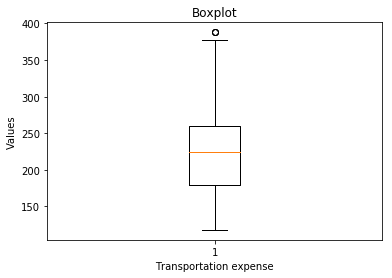

In [37]:
plt.boxplot(df['Transportation expense'])
plt.xlabel('Transportation expense')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

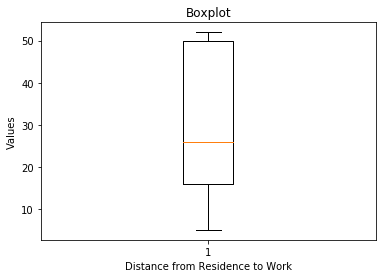

In [38]:
plt.boxplot(df['Distance from Residence to Work'])
plt.xlabel('Distance from Residence to Work')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

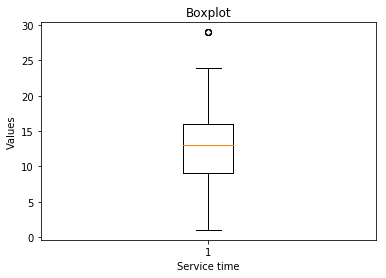

In [39]:
plt.boxplot(df['Service time'])
plt.xlabel('Service time')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

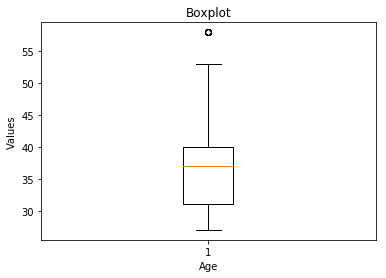

In [40]:
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

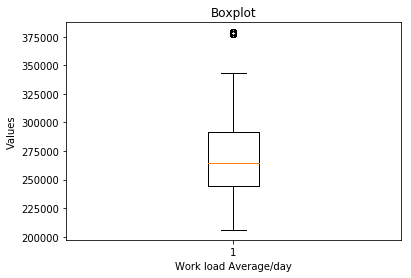

In [41]:
plt.boxplot(df['Work load Average/day'])
plt.xlabel('Work load Average/day')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

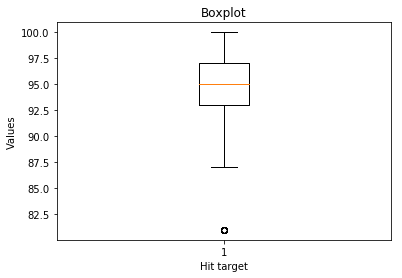

In [42]:
plt.boxplot(df['Hit target'])
plt.xlabel('Hit target')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

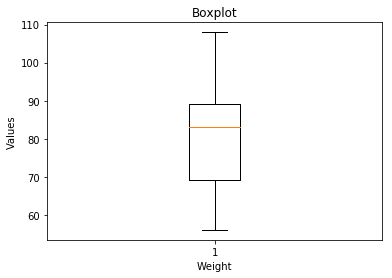

In [43]:
plt.boxplot(df['Weight'])
plt.xlabel('Weight')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

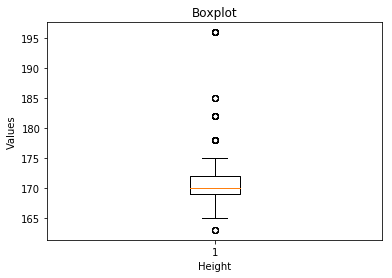

In [44]:
plt.boxplot(df['Height'])
plt.xlabel('Height')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

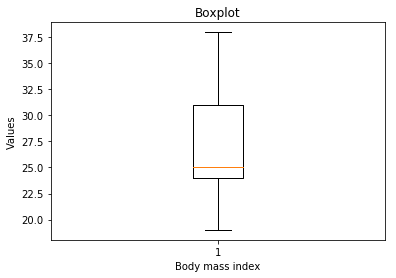

In [45]:
plt.boxplot(df['Body mass index'])
plt.xlabel('Body mass index')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0,0.5,'Values')

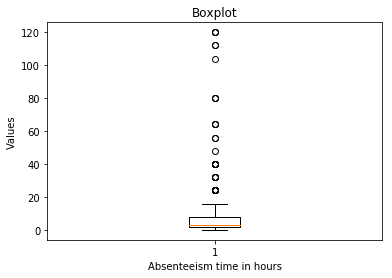

In [46]:
plt.boxplot(df['Absenteeism time in hours'])
plt.xlabel('Absenteeism time in hours')
plt.title('Boxplot')
plt.ylabel('Values')

In [47]:
cont

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [48]:
# List  of variables which doesn't contain any outliers
out = ['Distance from Residence to Work','Weight','Body mass index']

In [49]:
#Detect and delete outliers from variables having outliers
for i in cont:
    # Neglect the variables which don't have outliers
    if i in out:
        continue
        print(i)
        # q75= 75th percentile and q25 = 25th percentile
        q75,q25 = np.percentile(ea.loc[:,i], [75 ,25])
        # iqr= interquartile range
        iqr = q75 - q25 
        # minimum fence and  maximum fence
        
        minimum = q25 - (iqr*1.5)    
        maximum = q75 + (iqr*1.5)    
        print(minimum)    
        print(maximum) 
        
        # Replacing all outliers to NA
        ea.loc[ea[i]< minimum,i] = np.nan
        ea.loc[ea[i]> maximum,i] = np.nan
        

In [50]:
# Impute missing values with KNN
#ea = pd.DataFrame(KNN(k=5).complete(ea), columns = ea.columns)

In [51]:
# Checking if there is any missing value
ea.isnull().sum().sum()

0

In [52]:
df1 = ea.copy()

# Feature Selection

In [53]:
#Correlation analysis for continuous variables
#Correlation plot
df1_corr = df1.loc[:,cont]

In [54]:
df1_corr.shape

(718, 10)

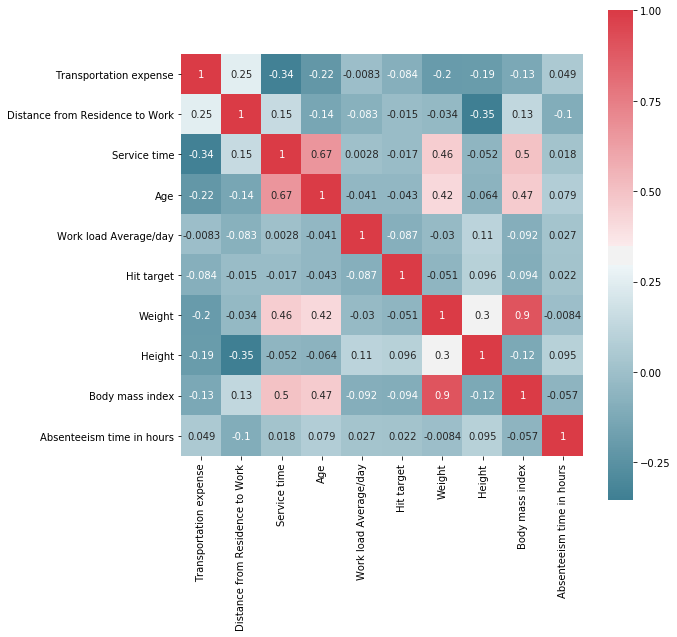

In [55]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(9, 9))

#Generate correlation matrix
corr = df1_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot =True)


In [56]:
#loop for chi square values
for i in cats:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df1['Absenteeism time in hours'], df1[i]))
    print(p)

ID
6.122110429874609e-11
Reason for absence
4.1960100286707124e-47
Month of absence
5.065350700134337e-07
Day of the week
0.0059347554301227195
Seasons
9.874457560408668e-07
Disciplinary failure
2.207076113445463e-120
Education
0.9999999997122889
Son
8.145191115702458e-16
Social drinker
7.628459290358426e-13
Social smoker
0.42109821908319545
Pet
0.5824160264227117


In [57]:
#loop for ANOVA test Since the target variable is continuous
for i in cats:
    f, p = stats.f_oneway(df1[i], df1["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 9.644224504321126e-59
P value for variable Reason for absence is 3.424671733900521e-106
P value for variable Month of absence is 0.17306669949457928
P value for variable Day of the week is 1.4818225553768272e-09
P value for variable Seasons is 3.5555626513751735e-18
P value for variable Disciplinary failure is 1.1543911246052354e-40
P value for variable Education is 2.4441905787960546e-28
P value for variable Son is 7.4063145681963005e-31
P value for variable Social drinker is 2.5424225625580106e-35
P value for variable Social smoker is 2.1438299342019347e-40
P value for variable Pet is 2.555265359989013e-33


In [58]:
ea_1 = df1.drop(['Education','Social smoker','Pet','Body mass index'], axis=1)

In [59]:
ea_1.shape

(718, 17)

# Feature Scaling

In [60]:
copy = ea_1.copy()
#marketing_train = df.copy()

In [61]:
#  Updated Continuous variables
cont = ['Transportation expense','Distance from Residence to Work','Service time','Age',
       'Work load Average/day','Hit target','Weight','Height','Absenteeism time in hours']

C:\Users\akgkanna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


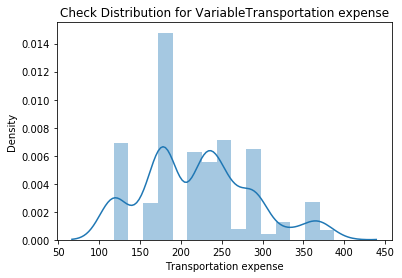

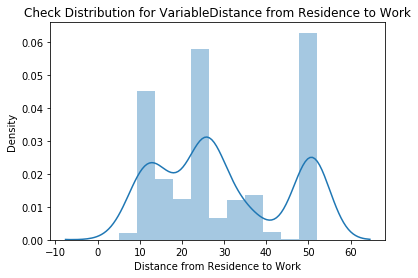

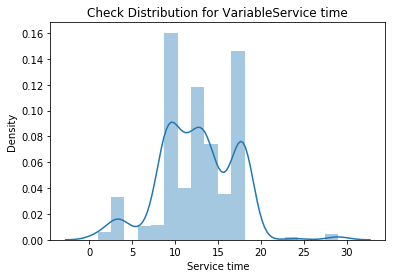

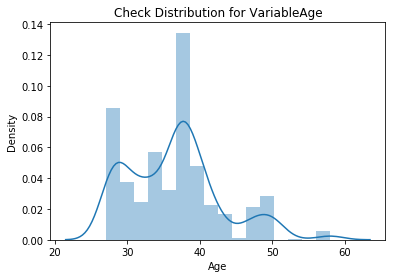

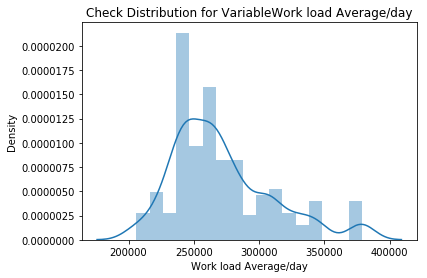

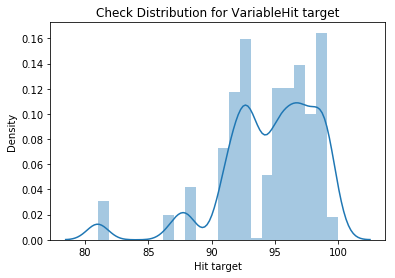

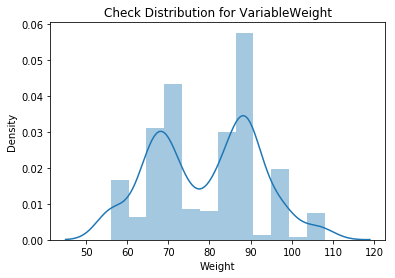

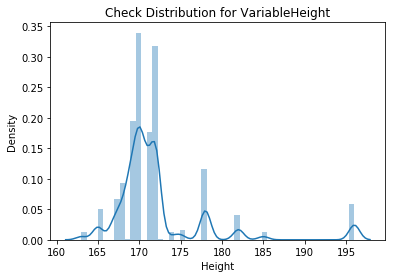

In [62]:
# Check for normally distributed variable in dataset
for i in cont:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(copy[i],bins ='auto')
    plt.title("Check Distribution for Variable" +str(i))
    plt.ylabel("Density")
    plt.show()

In [63]:
# Normalization
for i in cont:
    if i == 'Absenteeism time in hours':
        continue
    copy[i] = (copy[i] - copy[i].min())/(copy[i].max() - copy[i].min())

In [64]:
# Updated Categorical variables
cats = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Son','Social drinker']

In [65]:
# Machine Learning models

In [66]:
# Get dummy variables for categorical variables
ea_2 = pd.get_dummies(data=ea_1, columns = cats)

In [67]:
ea_2


,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Absenteeism time in hours,ID_1.0,...,Son_1.5865561199671363,Son_2.0,Son_3.0,Son_3.926527954687343,Son_4.0,Social drinker_0.0,Social drinker_0.0010678836802795126,Social drinker_0.5749952970662375,Social drinker_0.9333172604005298,Social drinker_1.0
0,289.000000,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,4.0,0,...,0,1,0,0,0,0,0,0,0,1
1,118.000000,13.0,18.0,50.0,239554.0,97.0,98.0,178.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,179.000000,51.0,18.0,38.0,239554.0,97.0,89.0,170.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,279.000000,5.0,14.0,39.0,239554.0,97.0,68.0,168.0,4.0,0,...,0,1,0,0,0,0,0,0,0,1
4,289.000000,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,2.0,0,...,0,1,0,0,0,0,0,0,0,1
5,323.142265,52.0,3.0,28.0,239554.0,97.0,80.0,172.0,8.0,0,...,0,0,0,0,0,0,0,0,0,1
6,260.000000,50.0,11.0,36.0,239554.0,97.0,65.0,168.0,4.0,0,...,0,0,0,0,1,0,0,0,0,1
7,155.000000,12.0,14.0,34.0,239554.0,97.0,95.0,196.0,40.0,0,...,0,1,0,0,0,0,0,0,0,1
8,235.000000,11.0,14.0,37.0,239554.0,97.0,88.0,172.0,8.0,1,...,0,0,0,0,0,1,0,0,0,0
9,260.000000,50.0,11.0,36.0,239554.0,97.0,65.0,168.0,8.0,0,...,0,0,0,0,1,0,0,0,0,1


In [68]:
# Copy dataframe
ea0 = ea_2.copy()
#ea.iloc[:,8].head()

In [69]:
ea2=ea_2.iloc[:, ea_2.columns!='Absenteeism time in hours']
#ea1.head(5)

In [70]:
# Creating a new dataframe
#df_0 = ea_2[['Absenteeism time in hours']].copy()

In [71]:
ea_2.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target', 'Weight',
       'Height', 'Absenteeism time in hours', 'ID_1.0',
       ...
       'Son_1.5865561199671363', 'Son_2.0', 'Son_3.0', 'Son_3.926527954687343',
       'Son_4.0', 'Social drinker_0.0', 'Social drinker_0.0010678836802795126',
       'Social drinker_0.5749952970662375',
       'Social drinker_0.9333172604005298', 'Social drinker_1.0'],
      dtype='object', length=150)

In [72]:
ea_2.head(5)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Absenteeism time in hours,ID_1.0,...,Son_1.5865561199671363,Son_2.0,Son_3.0,Son_3.926527954687343,Son_4.0,Social drinker_0.0,Social drinker_0.0010678836802795126,Social drinker_0.5749952970662375,Social drinker_0.9333172604005298,Social drinker_1.0
0,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,4.0,0,...,0,1,0,0,0,0,0,0,0,1
1,118.0,13.0,18.0,50.0,239554.0,97.0,98.0,178.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,179.0,51.0,18.0,38.0,239554.0,97.0,89.0,170.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,279.0,5.0,14.0,39.0,239554.0,97.0,68.0,168.0,4.0,0,...,0,1,0,0,0,0,0,0,0,1
4,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,2.0,0,...,0,1,0,0,0,0,0,0,0,1


In [73]:
# Splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ea_2.iloc[:,ea_2.columns!='Absenteeism time in hours'],ea_2.iloc[:,8], test_size = 0.20,random_state=123)

In [74]:
#Decision Trees

In [75]:
# Importing libraries for Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [76]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth=4).fit(X_train,y_train)

In [77]:
# Important features
#fit_DT.feature_importances_

In [78]:
# Calculating RMSE for training data
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [79]:
# Calculating RMSE for test data
pred_test = fit_DT.predict(X_test)
rmse_for_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error for Training data= "+str(rmse_for_train))
print("Root Mean Squared Error for Test data= "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) ="+str(r2_score(y_test,pred_test)))
rs=r2_score(y_test,pred_test)
#print(rs)
#adjusted_r_squared = 1-((1-rs)*(len(X_train)-1)/(len(X_train)-len(ea_2)-1))
#print((adjusted_r_squared))



Root Mean Squared Error for Training data= 10.046713656829244
Root Mean Squared Error for Test data= 16.053681550440167
R^2 Score(coefficient of determination) =-0.027729989438754155


In [80]:
# Import libraries for LR
import statsmodels.api as sm

In [81]:
# Train the model using the training sets
fit_LR =sm.OLS(ea_2.iloc[:,149],ea_2.iloc[:,0:149]).fit()

In [82]:
# Print out the statistics
fit_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Social drinker_1.0   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.273e+17
Date:                Sat, 10 Nov 2018   Prob (F-statistic):               0.00
Time:                        06:49:39   Log-Likelihood:                 13291.
No. Observations:                 718   AIC:                        -2.632e+04
Df Residuals:                     587   BIC:                        -2.572e+04
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Transportation expense                -1.666e-13   5.67e-11     -0.003      0.998   -1.12e-10    1.11e-10
Distance from Residence to Work       -1.038e-11   2.47e-10     -0.042      0.967   -4.96e-10    4.75e-10
Service time                          -1.816e-11   2.89e-08     -0.001      0.999   -5.69e-08    5.68e-08
Age                                    1.701e-11   1.14e-09      0.015      0.988   -2.22e-09    2.25e-09
Work load Average/day                 -1.948e-17   3.23e-15     -0.006      0.995   -6.35e-15    6.31e-15
Hit target                            -2.326e-12   4.71e-11     -0.049      0.961   -9.47e-11    9.01e-11
Weight                                -1.389e-10      0.003  -5.41e-08      1.000      -0.005       0.005
Height                                 2.527e-12   7.06e-10      0.004      0.997   -1.38e-09    1.39e-09
Absenteeism time in hours             -3.982e-13   8.64e-12     -0.046      0.963   -1.74e-11    1.66e-11
ID_1.0                                   -0.0829      0.030     -2.780      0.006      -0.141      -0.024
ID_2.0                                   -0.0829      0.030     -2.780      0.006      -0.141      -0.024
ID_3.0                                    0.1620      0.031      5.264      0.000       0.102       0.222
ID_4.0                                    0.0687      0.018      3.805      0.000       0.033       0.104
ID_5.0                                    0.1304      0.067      1.955      0.051      -0.001       0.261
ID_6.0                                   -0.1489      0.019     -7.997      0.000      -0.185      -0.112
ID_7.0                                    0.0644      0.031      2.109      0.035       0.004       0.124
ID_8.0                                    0.0501      0.032      1.550      0.122      -0.013       0.114
ID_9.0                                   -0.1489      0.029     -5.152      0.000      -0.206      -0.092
ID_10.0                                   0.1304   9.22e-05   1413.756      0.000       0.130       0.131
ID_11.0                                   0.0644      0.026      2.477      0.014       0.013       0.115
ID_12.0                                   0.1304      0.031      4.217      0.000       0.070       0.191
ID_13.0                                   0.1405      0.004     37.698      0.000       0.133       0.148
ID_14.0                                   0.0644      0.039      1.658      0.098      -0.012       0.141
ID_15.0                                   0.1304      0.018      7.213      0.000       0.095       0.166
ID_16.0                                   0.0644      0.013      5.134      0.000       0.040       0.089
ID_17.0                                  -0.1489      0.034     -4.374      0.000      -0.216      -0.082
ID_18.0  

In [83]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

C:\Users\akgkanna\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [84]:
# Building model on training data
fit_RF = RandomForestRegressor(n_estimators=500).fit(X_train,y_train) 

In [85]:
feature_importances = pd.DataFrame(fit_RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [86]:
feature_importances

,importance
Reason for absence_16.69252382788265,1.202893e-01
Work load Average/day,9.745354e-02
Reason for absence_9.0,6.656744e-02
Reason for absence_19.0,5.653808e-02
Reason for absence_12.0,5.016593e-02
Transportation expense,4.775055e-02
Reason for absence_13.0,4.117089e-02
Hit target,3.695813e-02
Month of absence_12.0,3.454376e-02
Age,2.690754e-02


In [87]:
# Calculating RMSE for training data
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [88]:
# Calculating RMSE for test data
pred_test = fit_RF.predict(X_test)
rmse_for_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error for Training data= "+str(rmse_for_train))
print("Root Mean Squared Error for Test data= "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) ="+str(r2_score(y_test,pred_test)))
#rs=r2_score(y_test,pred_test)
#adjusted_r_squared = 1-((1-rs)*(len(X_train)-1)/(len(X_train)-len(ea_2)-1))
#print((adjusted_r_squared))

Root Mean Squared Error for Training data= 5.182662959727653
Root Mean Squared Error for Test data= 15.215406348167642
R^2 Score(coefficient of determination) =0.07679775386438148


In [89]:
# Import libraries for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
# Building model on training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [91]:
# Calculating RMSE for training data to check overfitting 
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [92]:
# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error for Training data= "+str(rmse_for_train))
print("Root Mean Squared Error for Test data= "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) ="+str(r2_score(y_test,pred_test)))
#rs=r2_score(y_test,pred_test)
#adjusted_r_squared = 1-((1-rs)*(len(X_train)-1)/(len(X_train)-len(ea_2)-1))
#print((adjusted_r_squared))


Root Mean Squared Error for Training data= 6.077069393917981
Root Mean Squared Error for Test data= 15.401240380497264
R^2 Score(coefficient of determination) =0.05410889698769861


In [93]:
# Dimensionality Reduction using PCA

In [94]:
target = ea_2['Absenteeism time in hours']

In [95]:
# Using Splitting function
X_train,X_test,y_train,y_test = train_test_split(ea_2,target, test_size = 0.2,random_state=123)

In [96]:
 #ea.drop(['Absenteeism time in hours'], inplace= True, axis =1)
#ea.shape

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train  = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [98]:
# The amount of variance that each PC explains 
var = pca.explained_variance_ratio_
var


array([9.99996677e-01, 2.90280440e-06])

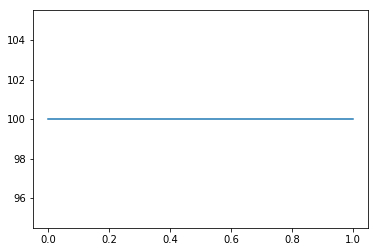

In [99]:
# Cumulative variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1
plt.plot(var1)
#plt.show()

In [100]:
# Importing libraries for Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [101]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth=4).fit(X_train,y_train)

In [102]:
# Calculating RMSE for training data
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [103]:
# Calculating RMSE for test data
pred_test = fit_DT.predict(X_test)
rmse_for_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error for Training data= "+str(rmse_for_train))
print("Root Mean Squared Error for Test data= "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) ="+str(r2_score(y_test,pred_test)))
#rs=r2_score(y_test,pred_test)
#adjusted_r_squared = 1-((1-rs)*(len(X_train)-1)/(len(X_train)-len(ea_2)-1))
#print(adjusted_r_squared)

Root Mean Squared Error for Training data= 10.642411959235242
Root Mean Squared Error for Test data= 20.708835725758394
R^2 Score(coefficient of determination) =-0.710177183667974


In [104]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
# Building model on training data
fit_RF = RandomForestRegressor(n_estimators=500).fit(X_train,y_train) 

In [105]:
# Calculating RMSE for training data
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [106]:
# Calculating RMSE for test data
pred_test = fit_RF.predict(X_test)
rmse_for_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error for Training data= "+str(rmse_for_train))
print("Root Mean Squared Error for Test data= "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) ="+str(r2_score(y_test,pred_test)))
#rs=r2_score(y_test,pred_test)
#adjusted_r_squared = 1-((1-rs)*(len(X_train)-1)/(len(X_train)-len(ea_2)-1))
#print(adjusted_r_squared)


Root Mean Squared Error for Training data= 4.728010720463978
Root Mean Squared Error for Test data= 16.941034001959725
R^2 Score(coefficient of determination) =-0.1444835903746664


In [107]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=5)
principalComponents = pca1.fit_transform(ea_2)

In [108]:
prinDf = pd.DataFrame(data=principalComponents,columns=['PC1','PC2','PC3','PC4','PC5'] )

In [109]:
finalDf = pd.concat([prinDf,df[['Absenteeism time in hours']]],axis=1)

In [110]:
# Import libraries for LR
import statsmodels.api as sm


In [111]:
# Train the model using the training sets
fit_LR=sm.OLS(target,prinDf).fit()

In [112]:
# Print out the statistics
fit_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.788
Model:                                   OLS   Adj. R-squared:                  0.787
Method:                        Least Squares   F-statistic:                     530.0
Date:                       Sat, 10 Nov 2018   Prob (F-statistic):          2.51e-237
Time:                               06:50:03   Log-Likelihood:                -2414.3
No. Observations:                        718   AIC:                             4839.
Df Residuals:                            713   BIC:                             4862.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1         9.299e-06   6.75e-06      1.377      0.169   -3.96e-06    2.26e-05
PC2            0.0101      0.004      2.549      0.011       0.002       0.018
PC3            0.5045      0.018     28.716      0.000       0.470       0.539
PC4            0.3549      0.020     17.906      0.000       0.316       0.394
PC5            0.7848      0.020     38.683      0.000       0.745       0.825
==============================================================================
Omnibus:                       87.737   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.012
Skew:                          -0.840   Prob(JB):                     2.16e-29
Kurtosis:                       4.261   Cond. No.                     3.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
finalDf

,PC1,PC2,PC3,PC4,PC5,Absenteeism time in hours
0,-31792.890726,67.579652,-2.658813,10.541868,-7.586626,4.0
1,-31792.887708,-105.168655,8.248954,10.803576,-16.839363,0.0
2,-31792.889722,-41.353922,-21.959525,11.536112,3.498880,2.0
3,-31792.889494,56.601342,22.435413,-15.031629,-11.439824,4.0
4,-31792.890745,67.559316,-3.674207,9.825200,-9.159924,2.0
5,-31792.891548,103.330677,-12.464510,5.521321,5.378784,8.0
6,-31792.890600,40.556545,-16.632475,-8.108347,10.723225,4.0
7,-31792.887379,-67.706221,32.867982,20.612040,12.936198,40.0
8,-31792.889142,12.299912,18.080628,3.622315,-11.907276,8.0
9,-31792.890562,40.597100,-14.607673,-6.680781,13.865304,8.0


In [114]:
# Make predictions by the model
#pred_LR = fit_LR(finalDf.iloc[0:5])

In [115]:
# Import libraries for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Building model on training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [116]:
# Calculating RMSE for training data to check overfitting 
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [117]:
# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error for Training data= "+str(rmse_for_train))
print("Root Mean Squared Error for Test data= "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) ="+str(r2_score(y_test,pred_test)))
#rs=r2_score(y_test,pred_test)
#adjusted_r_squared = 1-((1-rs)*(len(X_train)-1)/(len(X_train)-len(int(adjusted_r_squared)


Root Mean Squared Error for Training data= 6.055135046060776
Root Mean Squared Error for Test data= 17.335300156399484
R^2 Score(coefficient of determination) =-0.19837426333576857
